# **Dasar Analitik Data - Week 4**

## **Tugas-1: Statistics Summary**

**Nama: Aisyah Arifatul Alya** \
**NPM: 2206059383**

> Importing Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##### Dataset yang digunakan adalah sebagai berikut:
**[Cardiovascular Disease Dataset](https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset)**

> Importing Dataset from local

In [4]:
# localpath = r"C:\Users\arifa\OneDrive\Desktop\Documents\Tekkom Semester 6\Kecerdasan Buatan\Proyek UAS\Cardiovascular_Disease_Dataset\Cardiovascular_Disease_Dataset.csv"
# data_cardio = pd.read_csv(localpath)
# data_cardio.head(8)

> Importing Dataset from GitHub \
 (Yang digunakan untuk *code blocks* selanjutnya adalah dataset yang dibaca dari repositori GitHub, sehingga *notebook* dapat dijalankan di Google Colab)

In [26]:
url = 'https://raw.githubusercontent.com/arifatalya/Dataset-DAD/main/Cardiovascular_Disease_Dataset.csv'
df = pd.read_csv(url)
df.head(5)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


##### 1. Informasi Mengenai Kolom yang Terdapat dalam Dataset

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


##### 2. Menampilkan Mean dari 'age' dan 'restingBP'

In [28]:
df[["age", "restingBP"]].mean()

,0
age,49.242
restingBP,151.747


##### 3. Menampilkan Deskripsi dari Kolom 'age' dan 'restingBP':

- count: Jumlah dari nilai yang tidak kosong entrinya.
- mean: Nilai rata-rata.
- std: Standar deviasi.
- min: Nilai minimum.
- 25%: Persentil 25%.
- 50%: Persentil 50%.
- 75%: Persentil 75%.
- max: Nilai maksimum.

In [29]:
df[["age", "restingBP"]].describe()

,age,restingBP
count,1000.00000,1000.000000
mean,49.24200,151.747000
std,17.86473,29.965228
min,20.00000,94.000000
25%,34.00000,129.000000
50%,49.00000,147.000000
75%,64.25000,181.000000
max,80.00000,200.000000


##### 4. Rata-rata Maximum Heart Rate Male vs Female:
0 (female) / 1 (male)

In [30]:
df[["gender", "maxheartrate"]].groupby("gender").mean()

,maxheartrate
gender,
0,141.493617
1,146.700654


##### 5. Menampilkan Modus dari Maximum Heart Rate:

In [31]:
df["maxheartrate"].mode()

,maxheartrate
0,186


##### 6. Rata-rata Cholestrol Male vs Female:
0 (female) / 1 (male)

In [32]:
df[["gender", "serumcholestrol"]].groupby("gender").mean()

,serumcholestrol
gender,
0,340.289362
1,302.586928


##### 7. Melakukan Agregasi Data untuk Kolom Age, Cholestrol, Resting Blood Pressure, dan Max Heart Rate:

In [33]:
df.agg(
    {
        "age": ["min", "max", "median", "skew"],
        "serumcholestrol": ["min", "max", "median", "skew"],
        "restingBP": ["min", "max", "median", "skew"],
        "maxheartrate": ["min", "max", "median", "skew"],
    }
)

,age,serumcholestrol,restingBP,maxheartrate
min,20.000000,0.000000,94.000000,71.000000
max,80.000000,602.000000,200.000000,202.000000
median,49.000000,318.000000,147.000000,146.000000
skew,0.028408,-0.307025,0.020204,-0.251154


##### 8. Melakukan Pengecekan Missing Values dan Baris Duplikat (Tidak Ada):

In [34]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

##### 9. Menampilkan Persentil:

In [35]:
df.quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0.01,200944.93,20.00,0.0,0.0,95.0,0.00,0.0,0.0,72.99,0.0,0.0,0.0,0.0,0.0
0.05,668284.25,22.00,0.0,0.0,101.0,0.00,0.0,0.0,85.00,0.0,0.2,0.0,0.0,0.0
0.25,2536439.50,34.00,1.0,0.0,129.0,235.75,0.0,0.0,119.75,0.0,1.3,1.0,0.0,0.0
0.50,4952508.50,49.00,1.0,1.0,147.0,318.00,0.0,1.0,146.00,0.0,2.4,2.0,1.0,1.0
0.75,7681877.00,64.25,1.0,2.0,181.0,404.25,1.0,1.0,175.00,1.0,4.1,2.0,2.0,1.0
0.95,9473476.55,77.00,1.0,2.0,197.0,526.05,1.0,2.0,195.05,1.0,5.7,3.0,3.0,1.0
0.99,9876171.75,80.00,1.0,3.0,200.0,559.00,1.0,2.0,201.00,1.0,6.1,3.0,3.0,1.0


##### 10. Menghitung Jumlah dari Setiap Fitur *Categorical*:

In [37]:
categories = ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro',
                    'exerciseangia', 'slope', 'noofmajorvessels', 'target']

for col in categories:
    print(f"\n{col} value counts in percentage (%):")
    print(df[col].value_counts(normalize=True).mul(100).round(2))


gender value counts in percentage (%):
gender
1    76.5
0    23.5
Name: proportion, dtype: float64

chestpain value counts in percentage (%):
chestpain
0    42.0
2    31.2
1    22.4
3     4.4
Name: proportion, dtype: float64

fastingbloodsugar value counts in percentage (%):
fastingbloodsugar
0    70.4
1    29.6
Name: proportion, dtype: float64

restingrelectro value counts in percentage (%):
restingrelectro
0    45.4
1    34.4
2    20.2
Name: proportion, dtype: float64

exerciseangia value counts in percentage (%):
exerciseangia
0    50.2
1    49.8
Name: proportion, dtype: float64

slope value counts in percentage (%):
slope
2    32.2
1    29.9
3    19.9
0    18.0
Name: proportion, dtype: float64

noofmajorvessels value counts in percentage (%):
noofmajorvessels
1    34.4
0    27.5
2    26.5
3    11.6
Name: proportion, dtype: float64

target value counts in percentage (%):
target
1    58.0
0    42.0
Name: proportion, dtype: float64


##### 11. Menampilkan Histogram dari Data Numerik:

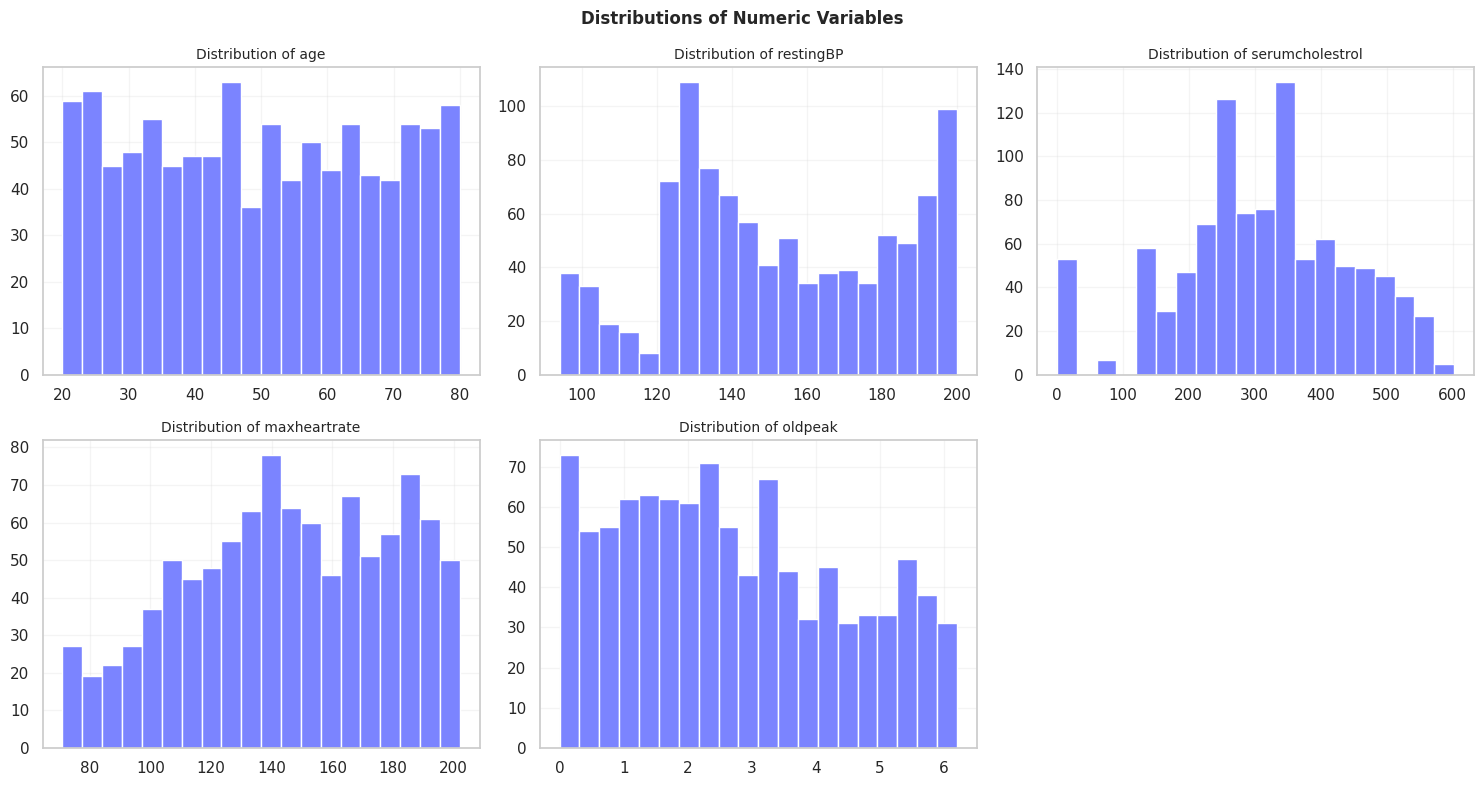

In [46]:
numerics = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerics):
    plt.subplot(2, 3, i+1)
    plt.hist(df[col], bins=20, color='#7B84FF', edgecolor='white')
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.grid(alpha=0.2)

plt.suptitle("Distributions of Numeric Variables", fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

##### 12. Menampilkan Boxplot dari Data Numerik:

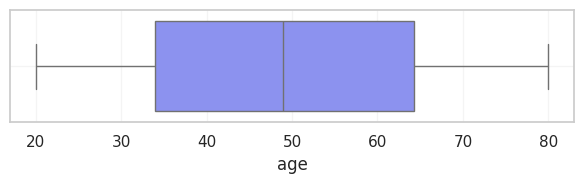

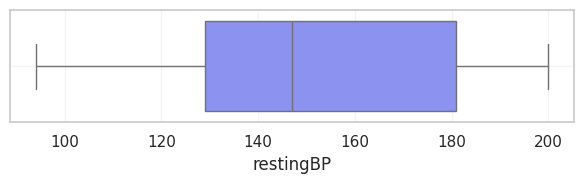

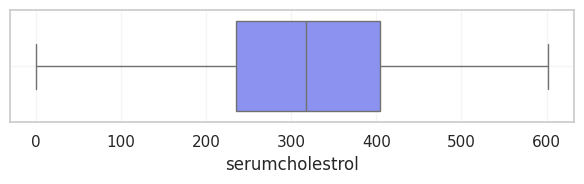

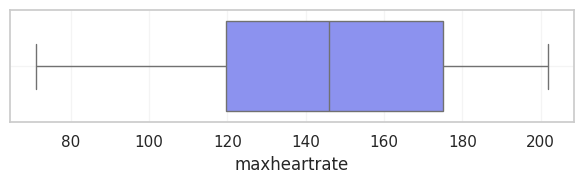

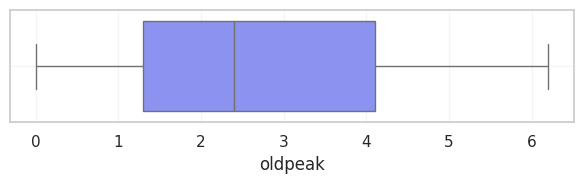

In [47]:
numerics = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

sns.set(style='whitegrid')

for col in numerics:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col], color='#7B84FF')
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

##### 13. Menampilkan Matriks Korelasi dari Data Numerik:

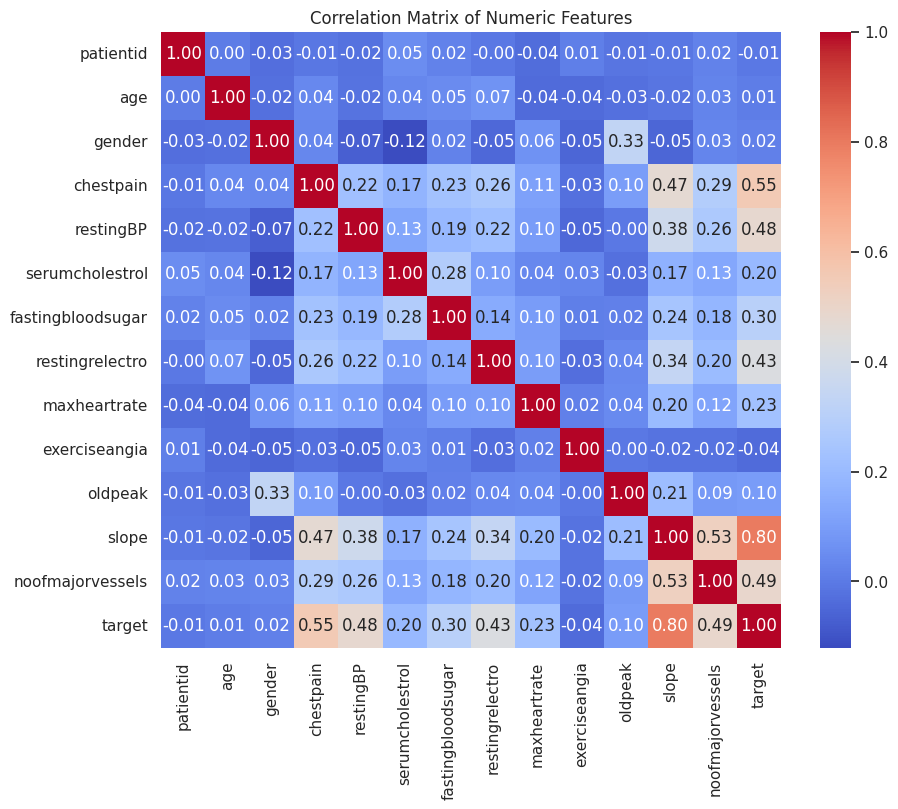

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()